In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def gen_Y(pi_0):
	# H_0 : Y ~ [N(3, 1) N(-1, 1)]
	# H_1 : Y_1, Y_2 ~ P_x; p(x) = 1/2*exp(-|x|)
    N = int(100000)
    #Y = np.zeros((2, N))
    Y =[]
    ber_exp = np.random.binomial(n=1, p=1-pi_0, size=N)
    #print(ber_exp)
    for i in ber_exp:
        if i == 0:
            #Y[:, i] = h0()
            Y.append(h0())
        else:   
            #Y[:, i] = h1()
            Y.append(h1())
        #print(Y[:, i])
    #Y = np.array(Y)#.reshape(2, -1)
    #print(Y)
    Y = np.matrix(Y).T
    return Y, ber_exp
def Gen_Y(pi_0):
    N = int(10e6)
    nH0 = int(N*pi_0)
    nH1 = N - nH0
    H0 = np.array([np.random.normal(3, 1, size=nH0), np.random.normal(-1, 1, size=nH0)])
    #print(H0.shape)
    H1 = np.array([np.random.laplace(size=nH1), np.random.laplace(size=nH1)])
    #print(H1.shape)
    Y = np.hstack((H0, H1))
    return Y#np.random.shuffle(Y, axis=1)

def px(instances=1):
    return np.random.laplace(size=instances)
# 	X = np.random.uniform(size=(instances,1))
# 	Y = np.random.uniform(size=(instances,1))
# 	return np.log(X/Y)

def h0():
    return np.array([np.random.normal(3, 1), np.random.normal(-1, 1)]).reshape(2, )

def h1():
    return np.array([px(), px()]).reshape(2, )

def opt_decision_rule(pi_0, Y):
    tau = pi_0/(1 - pi_0)
    a = np.array([3, -1]).reshape(2, 1)
    #decision = (np.linalg.norm(Y, axis=0)**2) + a@Y - 2*np.linalg.norm(Y, axis=0) <= 2*np.log(2*tau/np.pi) -10
    decision = (np.pi/2)*np.exp(0.5*(np.linalg.norm(Y - a, axis=0)**2) - np.linalg.norm(Y, axis=0, ord=1)) >= tau
    return decision.reshape(-1, )

def p0G1(delta, Y):
    G1 = Y[:, delta]
    #print(G1)
    a = np.array([3, -1]).reshape(2, 1)
    p0G1 = (0.5/np.pi)*np.exp(-0.5*(np.linalg.norm(G1-a, axis=0)**2))
    #print(p0G1)
    return np.sum(p0G1)/len(p0G1)

def p1G0(delta, Y):
    G0 = Y[:, np.logical_not(delta)]
    #print(G0)
    p1G0 = 0.25*np.exp(-1*(np.linalg.norm(G0, axis=0, ord=1)))
    return np.sum(p1G0)/len(p1G0)

def P0G1(delta, Y):
    G0 = Y[:, np.logical_not(delta)]
    #print(G1)
    a = np.array([3, -1]).reshape(2, 1)
    p0G0 = np.sum((0.5/np.pi)*np.exp(-0.5*(np.linalg.norm(G0-a, axis=0)**2)))
    #print(p0G1)
    return 1 - p0G0

def P1G0(delta, Y):
    G1 = Y[:, delta]
    #print(G0)
    p1G1 = np.sum(0.25*np.exp(-1*(np.linalg.norm(G1, axis=0, ord=1))))
    return 1-p1G1

def V(pi_0):
    Y = Gen_Y(pi_0)
    #print(Y)
    delta = opt_decision_rule(pi_0, Y)
    #print(delta)
    return pi_0*p0G1(delta, Y) + (1-pi_0)*p1G0(delta, Y)

#print(Y)

def bayes_risk(genrated_hypothesis, decisions):
    miss_classified = np.linalg.norm(genrated_hypothesis - decisions, ord=1)
    return miss_classified/genrated_hypothesis.shape[0]

In [18]:
pi_0 = np.linspace(0, 1, 100)

V_pi0 = []

for i in pi_0: 
    Y, genrated_hypothesis = gen_Y(i)
    bayes_decisionrule = opt_decision_rule(i, Y)
    V_pi0.append(bayes_risk(genrated_hypothesis, bayes_decisionrule))

<ipython-input-15-198f1b12caba>:45: RuntimeWarning: divide by zero encountered in double_scalars
  tau = pi_0/(1 - pi_0)


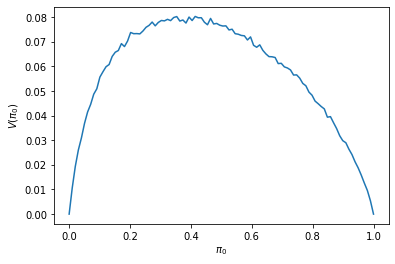

In [20]:
plt.plot(pi_0, V_pi0)
plt.xlabel('$\pi_0$')
plt.ylabel('$V(\pi_0)$')
plt.savefig('plt.png')

In [133]:
x = np.array([[3, 5], [4, 12]])
print(x)
print(np.linalg.norm(x, axis=0))

[[ 3  5]
 [ 4 12]]
[ 5. 13.]


In [134]:
pi_0 = 0.25
#
print(V(pi_0))

0.005522486410854026


In [122]:
# y = np.array([[0, 0], [0, 6]])
# pi_0 = 0.5
# d = opt_decision_rule(pi_0, y).reshape(-1, )
# print(d)
# print(np.logical_not(d))
# y = y[:, d]
# print(y)
# # a = np.array([-3, 1]).reshape(2, 1)
# # print(np.linalg.norm(y-a, axis=0))
# print(p0G1(y, d))
# print(p1G0(y, d))
pi_0 = 0.5
Y = np.array([[3, 0], [-1, 0]])
print(p1G0(pi_0, Y))

nan


<ipython-input-119-80b9e5eac2a5>:63: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum(p1G0)/len(p1G0)


In [123]:
Y = np.array([[3, 0], [-1, 0]])
print(opt_decision_rule(0.1, Y))

[False  True]


In [124]:
x = np.array([[1, 3, 4, 6], [2, 45, 6, 7]])
#[False, True]
print(x)
delta = np.array([True, False, False, True])
Gamma1 = x[:, np.logical_not(delta)]
print(Gamma1)

[[ 1  3  4  6]
 [ 2 45  6  7]]
[[ 3  4]
 [45  6]]


(2, 500)
(2, 500)
0.0033878223737425924 -42.148719663536454


(array([  3.,   4.,   9.,  36., 160., 190.,  56.,   7.,   7.,   3.]),
 array([-6.33090877, -5.07558387, -3.82025896, -2.56493405, -1.30960915,
        -0.05428424,  1.20104067,  2.45636557,  3.71169048,  4.96701539,
         6.22234029]),
 <BarContainer object of 10 artists>)

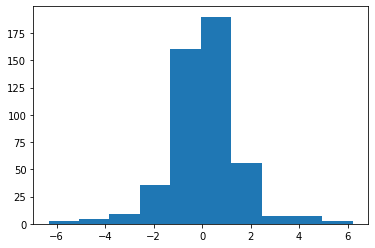

In [125]:
Y = Gen_Y(0.50)
delta = opt_decision_rule(0.5, Y)
print(p0G1(delta, Y), P0G1(delta, Y))
plt.hist(Y[1, delta])

In [139]:
x = np.random.normal(0, 1, size=10000)
PDFx = (1/np.sqrt(2*np.pi))*np.exp(-0.5*x**2)
print(np.trapz(PDFx, x=x))
print(np.sum((1/np.sqrt(2*np.pi))*np.exp(-0.5*x**2))/10000)

-9.336618518036403
0.2792217665766945
